In [1]:
import pyscreenshot as ImageGrab
import time

In [6]:
images_folder="captured_images/00/"
  
for i in range(0,100):
   time.sleep(8)
   im=ImageGrab.grab(bbox=(350,350,550,550)) #x1,y1,x2,y2
   print("saved......",i)
   im.save(images_folder+str(i)+'.png')
   print("clear screen now and redraw now........")

saved...... 0
clear screen now and redraw now........


KeyboardInterrupt: 

In [4]:
import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

In [3]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
511,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
322,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
X = data.drop(["label"],axis=1)
Y= data["label"]

6


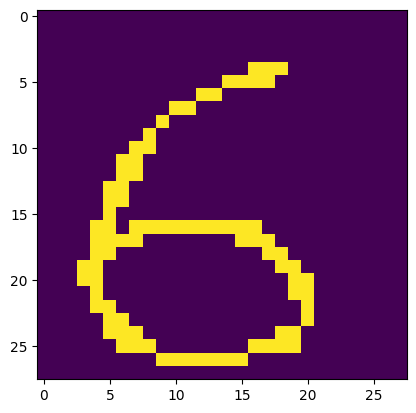

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 325
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)


In [9]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [10]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.5943396226415094


In [ ]:
#prediction of image drawn in paint
  
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
  
model=joblib.load("model/digit_recognizer")
images_folder="img/"
  
while True:
   img=ImageGrab.grab(bbox=(350,350,550,550))
    
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
    
   rows,cols=roi.shape
    
   X = []
    
   ##  Fill the data array with pixels one by one.
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
            
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (25,25), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
    
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 2


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 2


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 6


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 6


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 6


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\likhi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9
